In [2]:
from lib import *

In [3]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3=t1 *8;
t4=t1 -4;
t5=t1 /2;
t6=t2 * t3;
t7=t4-t5;
t8=t6 * t7;
t9=t5 * t2;
t10= ^ t9;
STORE(y , t8 );
STORE(z , t10 );"""


In [ ]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3= t1 * 8;
t4=t3 /t2;
STORE(y , t4 );"""

In [333]:
sample = """
t1=LOAD(x);
t1=LOAD(x);
t2=t1 + t1;
t1=t1 - 4;
t2=t1 /t2;
t1=t2 * t1;
STORE(y , t1 );
STORE(z , t2 );
STORE(z , t2 );
"""

In [327]:
sample = """
t1=LOAD(x);
t1=9;
t1=^t1;
t1= ^t1;
STORE(y , t1 );"""


In [7]:
sample = """
t3=LOAD(x);
t1=49;
t2=40+40;
t1=^t1;
t2=t2/2;
t1=t1*t2;
t1=t1/t3;
STORE(y , t1 );"""

Final IR
[('LOAD', 't1', 'x', ()),
 ('ADD', 't2', 't1', '4', (0,)),
 ('MUL', 't3', 't1', '8', (0,)),
 ('SUB', 't4', 't1', '4', (0,)),
 ('DIV', 't5', 't1', '2', (0,)),
 ('MUL', 't6', 't2', 't3', (1, 2)),
 ('SUB', 't7', 't4', 't5', (3, 4)),
 ('MUL', 't8', 't6', 't7', (5, 6)),
 ('MUL', 't9', 't5', 't2', (1, 4)),
 ('SQRT', 't10', 't9', (8,)),
 ('STORE', 'y', 't8', (7,)),
 ('STORE', 'z', 't10', (9,))]
ind ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 'y', 'z']
dep [[], ['t1'], ['t1'], ['t1'], ['t1'], ['t2', 't3'], ['t4', 't5'], ['t6', 't7'], ['t5', 't2'], ['t9'], ['t8'], ['t10']]
line: [(), (0,), (0,), (0,), (0,), (1, 2), (3, 4), (5, 6), (1, 4), (8,), (7,), (9,)]


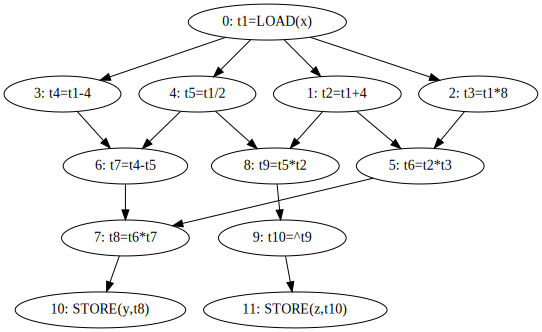

In [4]:

parse_instance = Parser()
IR,depend,indep,line_depend= parse_instance.parse(sample)
print('Final IR')
pprint(IR)
print("ind",indep)
print("dep",depend)
print("line:",line_depend)

parse_instance.dot
        

In [5]:
multi_core_count = 3   

multi_code_gen_instance = CodeGen(multi_core_count,path="multi_core_code/")
multi_code_gen_instance.generate_compiled_code(IR)

single_code_gen_instance = CodeGen(1,path="single_core_code/")
single_code_gen_instance.generate_compiled_code(IR)

AttributeError: 'CodeGen' object has no attribute 'generate_backend_code'

In [12]:
multi_instance = Simulator(multi_core_count,'multi_core_code/')
multi_instance.MEM['x']= 10
print(multi_instance.MEM)
multi_instance.run()
print(multi_instance.MEM)
    

{'x': 10}
[[['LOAD', 't3', 'x'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP']], [['NOP'], ['DIV', 't1', '280.0', 't3'], ['NOP']], [['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['NOP'], ['STORE', 'y', 't1']]]
Cycle:1,	PE_0: LOAD, t3, x[1], 	PE_1: NOP[1], 	PE_2: NOP[1], 
Cycle:2,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[8], 	PE_2: NOP[1], 
Cycle:3,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[7], 	PE_2: NOP[1], 
Cycle:4,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[6], 	PE_2: NOP[1], 
Cycle:5,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[5], 	PE_2: NOP[1], 
Cycle:6,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[4], 	PE_2: NOP[1], 
Cycle:7,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[3], 	PE_2: NOP[1], 
Cycle:8,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[2], 	PE_2: NOP[1], 
Cycle:9,	PE_0: NOP[1], 	PE_1: DIV, t1, 280.0, t3[1], 	PE_2: NOP[1], 
Cycle:10,	PE_0: NOP[1], 	PE_1: NOP[1], 	PE_2: STORE, y, t1[1], 
{'x': 10, 'y': 28.0}


In [13]:
seq_instance = Simulator(1,'single_core_code/')
seq_instance.MEM['x']= 10
print(seq_instance.MEM)
seq_instance.run()
print(seq_instance.MEM)

{'x': 10}
[[['LOAD', 't3', 'x'], ['DIV', 't1', '280.0', 't3'], ['STORE', 'y', 't1']]]
Cycle:1,	PE_0: LOAD, t3, x[1], 
Cycle:2,	PE_0: DIV, t1, 280.0, t3[8], 
Cycle:3,	PE_0: DIV, t1, 280.0, t3[7], 
Cycle:4,	PE_0: DIV, t1, 280.0, t3[6], 
Cycle:5,	PE_0: DIV, t1, 280.0, t3[5], 
Cycle:6,	PE_0: DIV, t1, 280.0, t3[4], 
Cycle:7,	PE_0: DIV, t1, 280.0, t3[3], 
Cycle:8,	PE_0: DIV, t1, 280.0, t3[2], 
Cycle:9,	PE_0: DIV, t1, 280.0, t3[1], 
Cycle:10,	PE_0: STORE, y, t1[1], 
{'x': 10, 'y': 28.0}


In [14]:
seq_instance.MEM == multi_instance.MEM

True